In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import statsmodels.api as sm

In [47]:
# Get the path to the desktop folder
desktop_path = os.path.expanduser('~/Desktop/New folder/2045-With all assignement fields')

# Construct the full file path
AMOD_path = os.path.join(desktop_path, 'AM Total OD.xlsx')
TAZ_path = os.path.join(desktop_path, 'TAZ.xlsx')



In [48]:

# Load matrix from Excel sheet (Orig-destination matrix)
matrix_df = pd.read_excel(AMOD_path, sheet_name='Total')

# Load population and employment data from another Excel sheet
pop_emp_df = pd.read_excel(TAZ_path, sheet_name='Sheet1')

In [49]:
# Convert cell values to floats
matrix_df = matrix_df.apply(pd.to_numeric, errors='coerce')

# Replace '--' values with 0
matrix_df = matrix_df.fillna(0)

In [50]:

# Calculate the sum of rows in the OD matrix
matrix_df['ODTotal'] = matrix_df.drop('Origins', axis=1).sum(axis=1)

In [51]:
for row in matrix_df:
    for cell in row:
        value_type = type(cell)
        print(f"Value: {cell}, Type: {value_type}")

Value: O, Type: <class 'str'>
Value: r, Type: <class 'str'>
Value: i, Type: <class 'str'>
Value: g, Type: <class 'str'>
Value: i, Type: <class 'str'>
Value: n, Type: <class 'str'>
Value: s, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 4, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 6, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 7, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 9, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 1, 

In [52]:
matrix_df

,Origins,1001,1004,1006,1007,1009,1011,1012,1013,1014,...,49040,49041,49042,49043,49044,49045,49046,49047,49048,ODTotal
0,1001,0.000000,7.906796,67.244629,0.978319,1.927664,10.345826,4.205253,1.104587,0.223952,...,3.879596,0.000994,0.042438,0.074203,0.022267,0.085929,0.134271,0.012799,0.018413,324.494629
1,1004,9.284732,0.000000,72.970222,3.133579,1.445438,6.895123,4.131463,1.148373,0.206355,...,2.630518,0.000900,0.036057,0.058625,0.031741,0.069620,0.125931,0.011580,0.012792,278.323394
2,1006,17.050203,16.504559,0.000000,5.194457,1.871797,13.719145,22.918303,5.289873,0.333967,...,3.971209,0.003139,0.064444,0.101090,0.059431,0.134969,0.238274,0.021222,0.018286,372.357923
3,1007,0.308436,0.515570,4.141364,0.000000,0.138105,1.254931,3.237309,1.178287,0.157109,...,0.459921,0.001235,0.009215,0.016304,0.015069,0.024337,0.050227,0.003872,0.001808,51.204811
4,1009,0.558896,0.420694,1.131184,0.166032,0.000000,2.148232,1.992255,0.436591,0.098326,...,9.218119,0.001305,0.018194,0.027696,0.015690,0.035070,0.061594,0.005286,0.072963,202.794524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5347,49044,0.109819,0.089322,0.324800,0.154793,0.134912,0.270516,1.760162,0.951263,2.389525,...,0.835877,0.000602,0.025312,0.045261,0.000000,4.876219,0.087375,0.008855,0.004698,230.674858
5348,49045,0.029005,0.018468,0.065197,0.024436,0.029755,0.063491,0.264122,0.117185,0.077328,...,0.202253,0.000603,0.004875,0.008636,2.273716,0.000000,0.028261,0.002077,0.000890,40.268660
5349,49046,0.208532,0.178707,0.710964,0.314016,0.264911,0.802187,3.065317,1.046249,0.331945,...,1.979132,0.238013,0.538709,1.346740,0.023855,0.132517,0.000000,1.324692,0.010285,933.016826
5350,49047,0.012697,0.008276,0.032070,0.012608,0.015830,0.033369,0.112991,0.044646,0.017088,...,0.102463,0.013467,0.077594,0.159179,0.001794,0.006669,2.342787,0.000000,0.000511,100.845296


In [11]:
pop_emp_df

,ID,Area,TAZ,COUNTY,COUNTY_CODE,ADJACENT_COUNTY,Land_Area,Water_Area,Total_Area,TAD10,...,2036 HHOLD,2036 POP,2036 Basic,2036 Retail,2036 Service,2045 HHOLD,2045 POP,2045 Basic,2045 Retail,2045 Service
0,4915,16.765556,42001,Ellis,139.0,NaN,16.750978,0.002328,16.753306,7.208340e+15,...,545,1527,444,30,269,545,1527,444,30,271
1,5291,41.615955,42005,Ellis,139.0,NaN,41.295078,0.289960,41.585038,7.208340e+15,...,452,1184,702,0,50,452,1184,702,0,50
2,5339,1.194887,21044,External,NaN,Ellis,1.194017,0.000873,1.194890,NaN,...,0,0,0,0,0,0,0,0,0,0
3,5084,21.771454,18076,Kaufman,257.0,NaN,21.602233,0.152763,21.754996,7.208340e+15,...,381,943,63,5,268,381,943,63,5,276
4,5292,21.466690,17100,Ellis,139.0,NaN,21.374513,0.075937,21.450450,7.208340e+15,...,95,231,13,0,7,95,231,13,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5347,5365,1.039986,21018,External,NaN,Hunt,1.039324,0.000661,1.039985,NaN,...,0,0,0,0,0,0,0,0,0,0
5348,5259,3.628747,20004,Hunt,231.0,NaN,3.410847,0.215542,3.626389,7.208340e+15,...,232,619,137,21,178,232,619,137,23,194
5349,5263,1.345450,20001,Hunt,231.0,NaN,1.129716,0.214874,1.344590,7.208340e+15,...,63,185,1,0,7,63,185,1,0,7
5350,5279,0.639569,20016,Hunt,231.0,NaN,0.609337,0.029795,0.639132,7.208340e+15,...,71,207,2,0,29,71,207,2,0,31


In [53]:
print(pop_emp_df.dtypes)

ID                   int64
Area               float64
TAZ                  int64
COUNTY              object
COUNTY_CODE        float64
ADJACENT_COUNTY     object
Land_Area          float64
Water_Area         float64
Total_Area         float64
TAD10              float64
TRACT_GEOID10      float64
BG_GEOID10         float64
NonDowntownAM        int64
NonDowntownOP        int64
MPA9                 int64
MPA12               object
Airport             object
External             int64
CBD                  int64
2023 HHOLD           int64
2023 POP             int64
2023 Basic           int64
2023 Retail          int64
2023 Service         int64
2026 HHOLD           int64
2026 POP             int64
2026 Basic           int64
2026 Retail          int64
2026 Service         int64
2036 HHOLD           int64
2036 POP             int64
2036 Basic           int64
2036 Retail          int64
2036 Service         int64
2045 HHOLD           int64
2045 POP             int64
2045 Basic           int64
2

In [57]:
print(matrix_df.columns)

Index(['Origins', '1001', '1004', '1006', '1007', '1009', '1011', '1012',
       '1013', '1014',
       ...
       '49040', '49041', '49042', '49043', '49044', '49045', '49046', '49047',
       '49048', 'ODTotal'],
      dtype='object', length=5354)


In [82]:
#New dataframe with only origins and OD table
reg_2045_df=matrix_df.iloc[:,[0,-1]]

In [83]:
reg_2045_df

,Origins,ODTotal
0,1001,324.494629
1,1004,278.323394
2,1006,372.357923
3,1007,51.204811
4,1009,202.794524
...,...,...
5347,49044,230.674858
5348,49045,40.268660
5349,49046,933.016826
5350,49047,100.845296


In [84]:
#List the columns selected to be appended to the reg_2045_df dataframe
selected_col_pop_emp_df=["TAZ","Area","2045 HHOLD","2045 POP","2045 Basic","2045 Retail","2045 Service"]

In [85]:
# Merge based on "Origins" in data_df and "TAZ" in other_df
reg_2045_df = reg_2045_df.merge(pop_emp_df[selected_col_pop_emp_df], left_on="Origins", right_on="TAZ", how="left")


In [86]:
reg_2045_df

,Origins,ODTotal,TAZ,Area,2045 HHOLD,2045 POP,2045 Basic,2045 Retail,2045 Service
0,1001,324.494629,1001,10.214340,245,5675,2179,238,2160
1,1004,278.323394,1004,1.635124,216,5733,123,12,913
2,1006,372.357923,1006,8.540456,289,5757,141,76,1165
3,1007,51.204811,1007,12.631117,25,5701,1,73,275
4,1009,202.794524,1009,2.558288,140,3638,77,56,283
...,...,...,...,...,...,...,...,...,...
5347,49044,230.674858,49044,21.368008,235,1172,69,50,660
5348,49045,40.268660,49045,10.720568,16,3147,173,6,364
5349,49046,933.016826,49046,10.383058,671,1168,100,965,2678
5350,49047,100.845296,49047,7.469014,70,1167,252,74,1414


In [89]:
#Check for merged right
row_1001 = pop_emp_df[pop_emp_df['TAZ'] == 1001]
row_1001

reg_2045_df.columns

Index(['Origins', 'ODTotal', 'TAZ', 'Area', '2045 HHOLD', '2045 POP',
       '2045 Basic', '2045 Retail', '2045 Service'],
      dtype='object')

In [94]:
#Select variables for linear regression
independent_variable = reg_2045_df[['Area', '2045 HHOLD', '2045 POP','2045 Basic', '2045 Retail', '2045 Service']]
dependent_variable = reg_2045_df['ODTotal']

In [95]:
independent_variable 


,Area,2045 HHOLD,2045 POP,2045 Basic,2045 Retail,2045 Service
0,10.214340,245,5675,2179,238,2160
1,1.635124,216,5733,123,12,913
2,8.540456,289,5757,141,76,1165
3,12.631117,25,5701,1,73,275
4,2.558288,140,3638,77,56,283
...,...,...,...,...,...,...
5347,21.368008,235,1172,69,50,660
5348,10.720568,16,3147,173,6,364
5349,10.383058,671,1168,100,965,2678
5350,7.469014,70,1167,252,74,1414


In [97]:
dependent_variable

0       324.494629
1       278.323394
2       372.357923
3        51.204811
4       202.794524
           ...    
5347    230.674858
5348     40.268660
5349    933.016826
5350    100.845296
5351      2.154249
Name: ODTotal, Length: 5352, dtype: float64

                            OLS Regression Results                            
Dep. Variable:                ODTotal   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     16.87
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           1.39e-16
Time:                        14:59:48   Log-Likelihood:                -45940.
No. Observations:                5352   AIC:                         9.189e+04
Df Residuals:                    5346   BIC:                         9.193e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1042.1413     23.876     43.647   

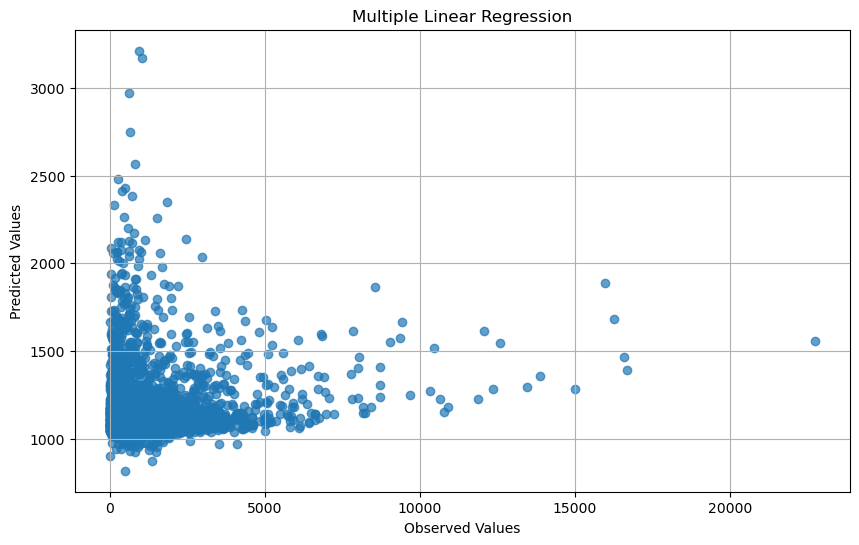

In [131]:
# Add a constant term to the independent variables
independent_variable = sm.add_constant(independent_variable)

# Fit the multiple linear regression model
model = sm.OLS(dependent_variable, independent_variable).fit()

# Print the regression summary
print(model.summary())

# Plot the regression lines
plt.figure(figsize=(10, 6))

plt.scatter(dependent_variable, model.predict(independent_variable), alpha=0.7)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression')
plt.grid(True)
plt.show()

In [133]:
num_features = model.model.exog.shape[1]
num_features

6

In [142]:
new_independent_variable=[10,245,658,136,15,26]

# Convert new_independent_variable to a numpy array
new_independent_variable_array = np.array(new_independent_variable)

# Add a constant term to the new independent variable data
new_independent_variable_with_const = sm.add_constant(new_independent_variable_array)

# Make predictions using the trained model
predictions = model.predict(new_independent_variable_with_const)

print(predictions)

ValueError: shapes (6,2) and (6,) not aligned: 2 (dim 1) != 6 (dim 0)

In [105]:
equation = f'ODTotal = {model.params[0]} + {model.params[1]} * Area + {model.params[2]} * 2045 HHOLD+ {model.params[3]} * 2045 POP+ {model.params[4]} * 2045 Basic+ {model.params[5]} * 2045 Retail+ {model.params[6]} * 2045 Service'

In [106]:
print("Equation of the Regression Plane:")
print(equation)

Equation of the Regression Plane:
ODTotal = 278.9496126553297 + -9.922393555757214 * Area + 1.170611646345273 * 2045 HHOLD+ 0.00024645188966301206 * 2045 POP+ -6.480981828433513e-05 * 2045 Basic+ -0.03345556277881387 * 2045 Retail+ -0.0007060604648130811 * 2045 Service


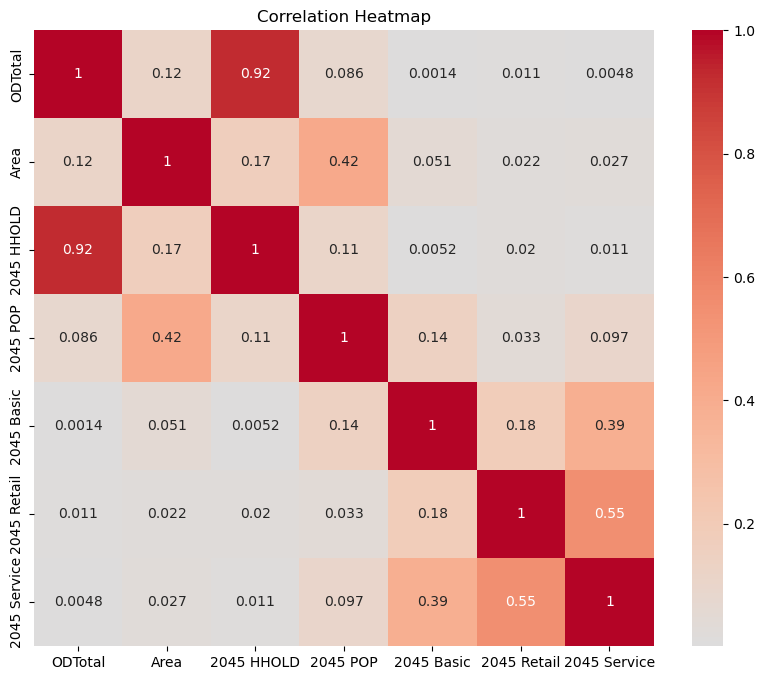

In [109]:
# Select the columns for correlation analysis
columns_of_interest = ['ODTotal', 'Area', '2045 HHOLD', '2045 POP','2045 Basic', '2045 Retail', '2045 Service']

# Compute the correlation matrix for selected columns
correlation_matrix = reg_2045_df[columns_of_interest].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### Excluding HHOLD

In [110]:
#Select variables for linear regression - Excluding HHOLD
independent_variable = reg_2045_df[['Area', '2045 POP','2045 Basic', '2045 Retail', '2045 Service']]
dependent_variable = reg_2045_df['ODTotal']

                            OLS Regression Results                            
Dep. Variable:                ODTotal   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     16.87
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           1.39e-16
Time:                        12:03:10   Log-Likelihood:                -45940.
No. Observations:                5352   AIC:                         9.189e+04
Df Residuals:                    5346   BIC:                         9.193e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1042.1413     23.876     43.647   

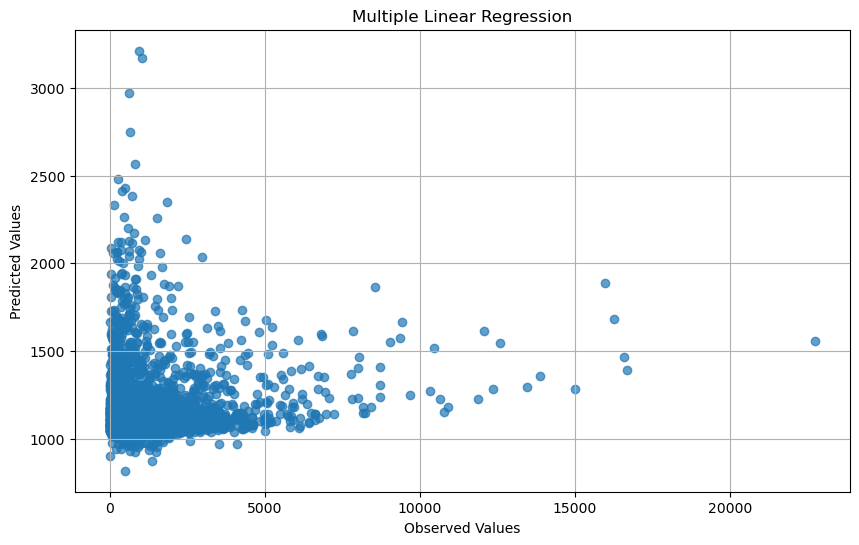

In [111]:
# Add a constant term to the independent variables
independent_variable = sm.add_constant(independent_variable)

# Fit the multiple linear regression model
model = sm.OLS(dependent_variable, independent_variable).fit()

# Print the regression summary
print(model.summary())

# Plot the regression lines
plt.figure(figsize=(10, 6))

plt.scatter(dependent_variable, model.predict(independent_variable), alpha=0.7)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression')
plt.grid(True)

In [118]:
equation = f'ODTotal = {model.params[0]} + {model.params[1]} * Area + {model.params[2]} * 2045 POP+ {model.params[3]} * 2045 Basic+ {model.params[4]} * 2045 Retail+ {model.params[5]} * 2045 Service'

In [119]:
print("Equation of the Regression Plane:")
print(equation)

Equation of the Regression Plane:
ODTotal = 1042.1413365323021 + 25.82531756808016 * Area + 0.019118906117665244 * 2045 POP+ -0.016781573845391314 * 2045 Basic+ 0.06455700951329033 * 2045 Retail+ -0.0033035602268484407 * 2045 Service


#### Worsend the model. Reject

In [145]:
from sklearn.model_selection import train_test_splitx_train, x_test, y_train, y_test = train_test_split(independent_variable, dependent_variable, test_size = 0.3, random_state = 100)

SyntaxError: invalid syntax (1728763663.py, line 1)

In [ ]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

In [ ]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))